Task1: setup . 
1. các bạn thêm gensim vào file requirements.txt rồi trên terminal gõ  "pip install -r requirements.txt" để cài các thư viện cần thiết cho bài thực hành này 
2. sau đó tải mô hình glove-wiki-gigaword-50

Task 1: Tải và sử dụng model có sẵn (Gensim)

In [1]:
# tải mô hình golve-pretrain 
from gensim.downloader import load

# Tải mô hình 'glove-wiki-gigaword-50' (~65MB)
model = load("glove-wiki-gigaword-50")

# Kiểm tra thông tin mô hình
print(f"Số lượng từ trong mô hình: {len(model.key_to_index)}")
print(f"Số chiều vector: {model.vector_size}")

[==================================================] 100.0% 66.0/66.0MB downloaded
Số lượng từ trong mô hình: 400000
Số chiều vector: 50


In [2]:
# LẤY VECTOR CỦA MỘT TỪ
word = "computer"
vector = model[word]
print(f"\nVector của từ '{word}':\n{vector}")

# TÍNH ĐỘ TƯƠNG ĐỒNG GIỮA HAI TỪ
word1, word2 = "king", "queen"
similarity = model.similarity(word1, word2)
print(f"\nĐộ tương đồng giữa '{word1}' và '{word2}': {similarity:.4f}")

# TÌM CÁC TỪ ĐỒNG NGHĨA (MOST SIMILAR)
top_similar = model.most_similar("computer", topn=10)
print("\nTop 10 từ gần nghĩa với 'computer':")
for w, score in top_similar:
    print(f"{w:15s}  {score:.4f}")



Vector của từ 'computer':
[ 0.079084 -0.81504   1.7901    0.91653   0.10797  -0.55628  -0.84427
 -1.4951    0.13418   0.63627   0.35146   0.25813  -0.55029   0.51056
  0.37409   0.12092  -1.6166    0.83653   0.14202  -0.52348   0.73453
  0.12207  -0.49079   0.32533   0.45306  -1.585    -0.63848  -1.0053
  0.10454  -0.42984   3.181    -0.62187   0.16819  -1.0139    0.064058
  0.57844  -0.4556    0.73783   0.37203  -0.57722   0.66441   0.055129
  0.037891  1.3275    0.30991   0.50697   1.2357    0.1274   -0.11434
  0.20709 ]

Độ tương đồng giữa 'king' và 'queen': 0.7839

Top 10 từ gần nghĩa với 'computer':
computers        0.9165
software         0.8815
technology       0.8526
electronic       0.8126
internet         0.8060
computing        0.8026
devices          0.8016
digital          0.7992
applications     0.7913
pc               0.7883


Task 2: Word Embedding Exploration

Task 2: Nhúng câu/văn bản


In [7]:
import numpy as np
from word_embedder import WordEmbedder

# --- KHỞI TẠO MÔ HÌNH ---
embedder = WordEmbedder("glove-wiki-gigaword-50")

# --- LẤY VECTOR CỦA TỪ ---
word = "hero"
vec = embedder.get_vector(word)
print(f"\n🔹 Vector của từ '{word}':\n{vec}\nChiều vector: {len(vec)}")

# --- TÍNH ĐỘ TƯƠNG ĐỒNG GIỮA 2 TỪ ---
w1, w2 = "love", "hate"
sim = embedder.get_similarity(w1, w2)
print(f"\n🔹 Độ tương đồng giữa '{w1}' và '{w2}': {sim:.4f}")

# --- TÌM TOP TỪ GẦN NGHĨA ---
target = "clever"
print(f"\n🔹 Top từ gần nghĩa nhất với '{target}':")
for w, s in embedder.get_most_similar(target, top_n=10):
    print(f"{w:15s}  {s:.4f}")

# --- NHÚNG CÂU / VĂN BẢN ---
sentence = "There are no permanent enemies, nor are there permanent friends."
doc_vec = embedder.get_document_vector(sentence)
print(f"\n🔹 Vector biểu diễn văn bản:\n{doc_vec}\nChiều vector: {len(doc_vec)}")

# --- SO SÁNH ĐỘ TƯƠNG ĐỒNG GIỮA HAI CÂU ---
sent1 = "The king rules the kingdom"
sent2 = "The queen governs the empire"

vec1 = embedder.get_document_vector(sent1)
vec2 = embedder.get_document_vector(sent2)

from numpy.linalg import norm
cosine_sim = np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))
print(f"\n🔹 Độ tương đồng giữa hai câu:\n'{sent1}'\n'{sent2}'\n➡ Cosine Similarity: {cosine_sim:.4f}")


🔹 Loading model 'glove-wiki-gigaword-50' ... (có thể mất vài phút lần đầu)
Model loaded successfully!

🔹 Vector của từ 'hero':
[-0.26141   0.58084   0.082065 -0.019771  1.0041   -0.10656  -0.25769
  0.14856  -0.43527   0.64972   0.014508  0.63765  -0.62944   0.38705
  0.61637  -0.79619   0.41231   0.63455  -0.93001   0.47994  -1.2519
  0.45499  -0.78659  -0.04093   0.70027  -1.7713   -1.0695   -0.67043
  0.14878   0.21102   1.422    -0.086565 -0.47039  -0.034748 -0.1786
  0.70021  -0.084792 -0.27317  -0.9316   -0.9261    0.16159   0.62584
 -0.61484  -0.58984   0.1871    0.47937  -0.3746   -0.82852   0.042699
 -0.4916  ]
Chiều vector: 50

🔹 Độ tương đồng giữa 'love' và 'hate': 0.6459

🔹 Top từ gần nghĩa nhất với 'clever':
inventive        0.8303
clumsy           0.8099
deft             0.8099
imaginative      0.8089
ingenious        0.7985
straightforward  0.7814
witty            0.7610
amusing          0.7576
wordplay         0.7454
humorous         0.7428

🔹 Vector biểu diễn văn bản:


Task 3: Document Embedding
Task 3: Huấn luyện model trên tập dữ liệu nhỏ (Gensim)

In [1]:
import re
from gensim.utils import simple_preprocess

file_path = r"D:\project\nlp\week2\lab1_tokenization\src\data\en_ewt-ud-train.txt"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

# Chia nhỏ văn bản thành các câu và token hóa
sentences = [simple_preprocess(sent) for sent in re.split(r'[.!?]', text) if sent.strip()]

print(f"Số câu đọc được: {len(sentences)}")
print(f"Ví dụ 1 câu: {sentences[0][:10]}")

# --- 2 huấn luyện mô hình word2vec ---
from gensim.models import Word2Vec

model = Word2Vec(
    sentences=sentences,
    vector_size=100,   # số chiều của vector
    window=5,          # phạm vi ngữ cảnh
    min_count=2,       # bỏ qua từ xuất hiện < 2 lần
    workers=4,
    sg=1               # 1 = Skip-gram, 0 = CBOW
)

print("\n Huấn luyện Word2Vec thành công!")

# --- 3. LƯU MÔ HÌNH ---
model_save_path = "word2vec_custom.model"
model.save(model_save_path)
print(f" Mô hình đã được lưu tại: {model_save_path}")

# --- 4. TẢI LẠI MÔ HÌNH ---
from gensim.models import Word2Vec
loaded_model = Word2Vec.load(model_save_path)
print(" Mô hình đã được tải lại thành công!")



Số câu đọc được: 11995
Ví dụ 1 câu: ['al', 'zaman', 'american', 'forces', 'killed', 'shaikh', 'abdullah', 'al', 'ani', 'the']

 Huấn luyện Word2Vec thành công!
 Mô hình đã được lưu tại: word2vec_custom.model
 Mô hình đã được tải lại thành công!


Evaluation của task3 

In [4]:
!python lab4_test.py


🔹 Loading model 'glove-wiki-gigaword-50'
Model loaded successfully!
Vector của 'king':
[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]

Similarity (king, queen): 0.7839
Similarity (king, man): 0.5309

10 từ giống 'computer' nhất:
computers       0.9165
software        0.8815
technology      0.8526
electronic      0.8126
internet        0.8060
computing       0.8026
devices         0.8016
digital         0.7992
applications    0.7913
pc              0.7883

Vector biểu diễn câu:
[ 0.02444201  0.378018   -0.638166    0.0128046   0.0524286   0.11954119
 -0.316518   -0.08776999  0.0776199  -0.541834  ]


Task4 
Bonus Task: Training a Word2Vec Model from Scratch và Advanced Task: Scaling Word2Vec with Apache Spark
phần huấn luyện với gesim trong bonus task đã được làm trên task3 
Huấn luyện model trên tập dữ liệu lớn SPark


In [5]:
# khởi tạo spark seassion 
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Word2VecTraining_LargeDataset") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

print(" SparkSession initialized!")


 SparkSession initialized!


In [6]:
# Đọc file Json lớn 
file_path = r"D:\\project\\nlp\\week3\\data\\c4-train.00000-of-01024-30K.json"

# Đọc file JSON bằng Spark
df = spark.read.json(file_path)

# Xem schema và 5 dòng đầu
df.printSchema()
df.show(5, truncate=100)


root
 |-- text: string (nullable = true)
 |-- timestamp: string (nullable = true)
 |-- url: string (nullable = true)

+----------------------------------------------------------------------------------------------------+--------------------+--------------------------------------------------------------------------------------+
|                                                                                                text|           timestamp|                                                                                   url|
+----------------------------------------------------------------------------------------------------+--------------------+--------------------------------------------------------------------------------------+
|Beginners BBQ Class Taking Place in Missoula!\nDo you want to get better at making delicious BBQ?...|2019-04-25T12:57:54Z|                        https://klyq.com/beginners-bbq-class-taking-place-in-missoula/|
|Discussion in 'Mac OS X Lion (10.7)' 

Chuyển nội dung thành danh sách token (chuẩn bị cho Word2Vec)

In [ ]:
from pyspark.sql.functions import col, lower, regexp_replace, split

text_col = "text"
# làm sạch cột và tokenize
df_clean = df.withColumn(
    "clean_text",
    lower(regexp_replace(col(text_col), "[^a-zA-Z\s]", ""))
)

df_tokens = df_clean.withColumn("tokens", split(col("clean_text"), "\s+"))

df_tokens.select("tokens").show(5, truncate=100)


+----------------------------------------------------------------------------------------------------+
|                                                                                              tokens|
+----------------------------------------------------------------------------------------------------+
|[beginners, bbq, class, taking, place, in, missoula, do, you, want, to, get, better, at, making, ...|
|[discussion, in, mac, os, x, lion, started, by, axboi, jan, ive, got, a, gb, internal, drive, and...|
|[foil, plaid, lycra, and, spandex, shortall, with, metallic, slinky, insets, attached, metallic, ...|
|[how, many, backlinks, per, day, for, new, site, discussion, in, black, hat, seo, started, by, om...|
|[the, denver, board, of, education, opened, the, school, year, with, an, update, on, projects, th...|
+----------------------------------------------------------------------------------------------------+
only showing top 5 rows


In [ ]:
from pyspark.ml.feature import Word2Vec
# khởi tạo mô hình Word2Vec
word2Vec = Word2Vec(
    vectorSize=100,       # số chiều vector
    minCount=5,           # bỏ qua từ xuất hiện ít hơn 5 lần
    inputCol="tokens",
    outputCol="word_vectors"
)

# Huấn luyện mô hình
w2v_model = word2Vec.fit(df_tokens)
print("Word2Vec model trained successfully!")


Word2Vec model trained successfully!


lưu mô hình 

In [ ]:
save_path = "./word2vec_spark_model"
w2v_model.save(save_path)
print(f" Model saved at: {save_path}")


In [18]:
# Lấy vector cho một từ cụ thể (ví dụ "computer")
vector = w2v_model.getVectors().filter(col("word") == "computer").collect()
if vector:
    print("Vector cho từ 'computer':", vector[0].asDict()["vector"][:10])

# Hiển thị 10 từ gần nghĩa với "computer"
w2v_model.findSynonyms("computer", 10).show()


Vector cho từ 'computer': [ 2.26276845e-01 -3.98697071e-02  2.11614981e-01  2.10631602e-02
  3.02959085e-01  2.66727438e-04 -2.47048751e-01  2.21918598e-01
  2.38459244e-01  1.35775715e-01]
+-----------+------------------+
|       word|        similarity|
+-----------+------------------+
|    desktop|0.6788263320922852|
|     laptop|0.6427996158599854|
|    uwowned|0.6400086879730225|
|  computers|0.6363863945007324|
|    browser| 0.598209023475647|
|     device|0.5973107814788818|
|       sync|0.5834141373634338|
|programming|0.5808985233306885|
|      linux|0.5762199759483337|
|         wf|0.5750893354415894|
+-----------+------------------+



Task 5: Trực quan hóa Embedding 

🔹 Đang giảm chiều bằng PCA...


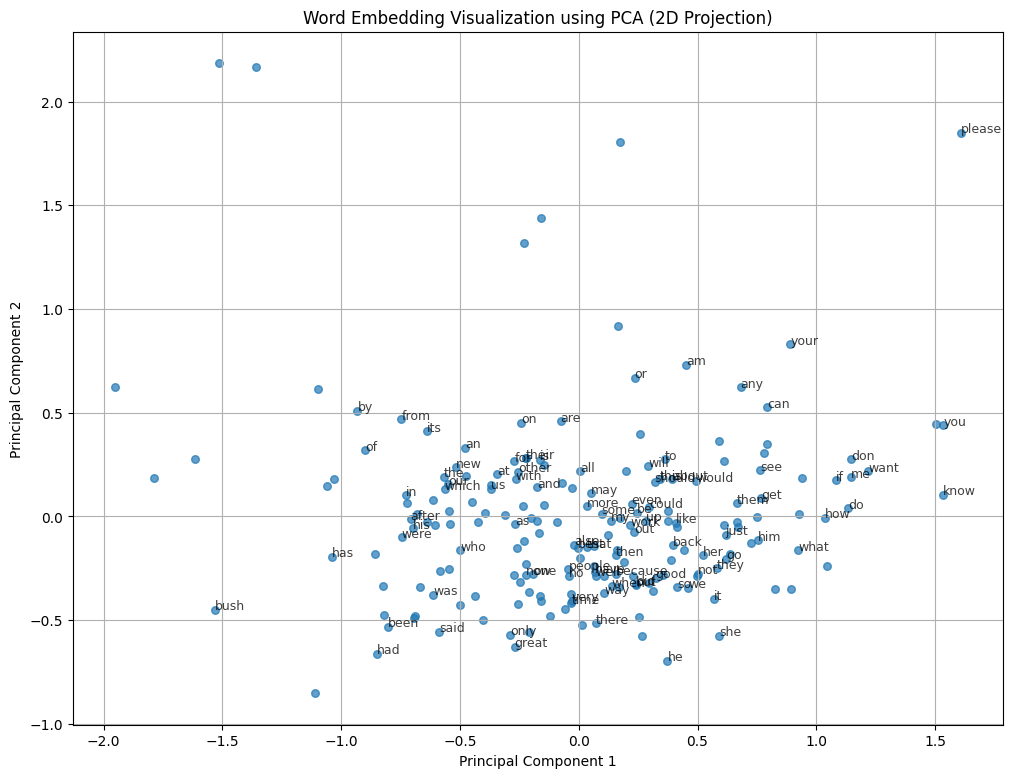

In [ ]:
from gensim.models import Word2Vec  # Import lớp Word2Vec từ Gensim để load model
model_path = r"D:\project\nlp\week5\word2vec_custom.model"  # Đường dẫn tới file model Word2Vec đã train
model = Word2Vec.load(model_path)  # Load mô hình Word2Vec từ file

wv = model.wv  # Lấy phần Word Vectors (embedding) từ model

words = list(wv.key_to_index.keys())[:200]  # Lấy 200 từ đầu trong vocabulary
X = wv[words]  # Lấy vector tương ứng của các từ này

from sklearn.decomposition import PCA  # Import PCA để giảm chiều embedding
import matplotlib.pyplot as plt  # Import matplotlib để vẽ biểu đồ

print("🔹 Đang giảm chiều bằng PCA...")  # In thông báo
pca = PCA(n_components=2)  # Khởi tạo PCA để giảm embedding từ nhiều chiều xuống 2D
X_reduced = pca.fit_transform(X)  # Áp dụng PCA lên các vector từ, trả về ma trận 2 chiều

plt.figure(figsize=(12, 9))  # Tạo figure với kích thước 12x9 inch
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=30, alpha=0.7)  # Vẽ scatter plot các điểm từ embedding 2D

# Vẽ chú thích từ (annotation) lên biểu đồ cho 100 từ đầu tiên
for i, word in enumerate(words[:100]):
    plt.annotate(word, xy=(X_reduced[i, 0], X_reduced[i, 1]), fontsize=9, alpha=0.75)

plt.title("Word Embedding Visualization using PCA (2D Projection)")  # Tiêu đề biểu đồ
plt.xlabel("Principal Component 1")  # Nhãn trục x
plt.ylabel("Principal Component 2")  # Nhãn trục y
plt.grid(True)  # Hiển thị lưới
plt.show()  # Hiển thị biểu đồ


2. Báo cáo và phân tích 
- Giải thích các bước thực hiện 
+ Task 1: Tải và sử dụng model có sẵn (Gensim)
    Tải mô hình GloVe pre-trained (glove-wiki-gigaword-50) từ kho gensim.
    In thông tin cơ bản của mô hình (số từ, số chiều vector).
    Lấy vector của từ "computer" và in ra.
    Tính độ tương đồng cosine giữa hai từ ("king" và "queen") và liệt kê top-10 từ tương tự với "computer".

+ Task 2 Nhúng câu/văn bản
    Khởi tạo mô hình 
    Lấy vector của một từ (embedding của "hero").
    Tính độ tương đồng giữa hai từ ("love" và "hate").
    Tìm top các từ gần nghĩa với "clever".
    Tạo vector biểu diễn cho một câu/văn bản bằng cách trung bình vector các từ.
    So sánh độ tương đồng giữa hai câu thông qua cosine similarity giữa hai vector câu.
    -> trình diễn đầy đủ các chức năng chính của Word Embedding

+ Task 3 Huấn luyện model trên tập dữ liệu nhỏ (Gensim)
    Huấn luyện mô hình Word2Vec bằng gensim:
        Đọc và tiền xử lý dữ liệu từ file .txt.( sử dụng biểu thức chính quy)
        Huấn luyện mô hình Skip-gram với 100 chiều vector.
        Lưu và tải lại mô hình đã huấn luyện.
    Đánh giá mô hình Word Embedding (với GloVe pre-trained):
        Lấy vector của từ "king".
        Tính độ tương đồng giữa các cặp từ (king–queen, king–man).
        Tìm 10 từ gần nghĩa nhất với "computer".
        Nhúng câu "The queen rules the country." thành vector biểu diễn.
     -> Code thể hiện quy trình huấn luyện và sử dụng mô hình embedding

+ Task 4 Huấn luyện model trên tập dữ liệu lớn (Spark)     
    Khởi tạo SparkSession – cấu hình bộ nhớ và khởi chạy môi trường Spark.
    Đọc dữ liệu lớn (JSON) – sử dụng spark.read.json() để nạp dữ liệu vào DataFrame.
    Tiền xử lý văn bản – chuyển chữ thường, loại bỏ ký tự đặc biệt, và tách từ thành danh sách tokens.
    Huấn luyện Word2Vec – tạo mô hình Word2Vec với 100 chiều, huấn luyện trên cột tokens.
    Lưu mô hình – lưu lại kết quả bằng w2v_model.save(path).
    Đánh giá nhanh – in vector của từ "computer" và hiển thị 10 từ gần nghĩa nhất.
    -> triển khai Word2Vec quy mô lớn bằng Spark MLlib, thay vì Gensim.

+ Task 5: Trực quan hóa Embedding 
    Tải mô hình Word2Vec đã huấn luyện (word2vec_custom.model) bằng Gensim.
    Lấy danh sách từ và vector tương ứng (200 từ đầu tiên).
    Giảm chiều vector từ 100D → 2D bằng PCA (Principal Component Analysis).
    Vẽ biểu đồ scatter plot hiển thị vị trí các từ trên mặt phẳng 2D.
    Gắn nhãn các từ (annotate) để quan sát các cụm nghĩa gần nhau.
    -> sử dụng PCA để trực quan hóa không gian embedding, giúp nhìn thấy quan hệ ngữ nghĩa giữa các từ.

- Các bước chạy code : các bạn chỉ cần tải các thư viện requirements.txt và ấn chạy từng shell 1 trong notebook này là được 

- Phân tích kết quả
+ Nhận xét về độ tương đồng và các từ đồng nghĩa tìm được từ model pre-trained.

    1 Độ tương đồng giữa “king” và “queen” = 0.7839:
    Đây là một giá trị cosine similarity cao, chứng tỏ hai từ này có mối quan hệ ngữ nghĩa mạnh — chúng cùng nằm trong miền từ vựng “hoàng gia” (royalty).
    → Mô hình pre-trained đã nắm bắt được quan hệ giới tính và vai trò tương tự nhau giữa các từ như “king” ↔ “queen”.

    2 Top 10 từ gần nghĩa với “computer”:
    Các từ như “computers”, “software”, “technology”, “electronic”, “internet”, “computing”, “devices”, “digital”, “applications”, “pc” đều có ngữ nghĩa hoặc ngữ cảnh sử dụng tương đồng.
    → Điều này cho thấy mô hình hiểu được mối liên hệ ngữ nghĩa và chức năng — ví dụ, “software” và “computer” thường xuất hiện cùng nhau, “digital” và “devices” cùng thuộc lĩnh vực công nghệ.

    Kết luận 
    Mô hình GloVe pre-trained thể hiện khả năng nắm bắt ngữ nghĩa và mối quan hệ ngữ cảnh rất tốt. Các giá trị tương đồng và danh sách từ gần nghĩa đều hợp lý, phản ánh chính xác hiểu biết ngôn ngữ tự nhiên trong lĩnh vực công nghệ và ngữ cảnh phổ biến.

+ Phân tích biểu đồ trực quan hóa: Các từ có gần nhau như kỳ vọng không? Có cụm từ nào thú vị không? Giải thích tại sao.
    1️ Tổng quan:
    Biểu đồ thể hiện phân bố của các vector từ sau khi giảm xuống 2D bằng PCA, giúp ta quan sát mối quan hệ ngữ nghĩa giữa các từ mà mô hình Word2Vec học được.

    2️ Nhóm từ gần nhau (kỳ vọng):
    Các từ có ngữ nghĩa hoặc ngữ cảnh sử dụng tương tự nằm gần nhau — điều này là đúng như kỳ vọng:
    Nhóm đại từ và động từ thường dùng trong hội thoại (you, your, know, want, do, can, see) nằm gần nhau → biểu hiện cụm ngữ cảnh giao tiếp.
    Nhóm đại từ ngôi thứ ba và động từ liên quan (he, she, him, her, they, them) cũng nằm gần nhau → phản ánh tính tương đồng ngữ pháp và ngữ cảnh.
    Các từ chức năng như of, in, by, from, on tụ lại một cụm riêng → cho thấy mô hình hiểu rằng đây là nhóm từ ngữ pháp không mang nhiều ngữ nghĩa nội dung.

    3️ Cụm từ thú vị:
    Từ “please” nằm xa hẳn các cụm khác — điều này có thể vì nó mang ngữ nghĩa cảm xúc và lịch sự, ít xuất hiện cùng nhóm từ ngữ pháp hoặc đại từ.
    “bush” nằm tách biệt — có thể vì trong tập dữ liệu, “bush” thường được dùng như tên riêng (George Bush), nên có ngữ cảnh khác biệt rõ rệt so với các từ phổ biến.

    4️ Giải thích:
    PCA chỉ giữ lại 2 thành phần chính trong không gian hàng trăm chiều, nên một số quan hệ có thể bị méo nhẹ.
    Tuy nhiên, việc các cụm từ có cùng chức năng hoặc ngữ cảnh nằm gần nhau chứng tỏ mô hình học được mối quan hệ ngữ nghĩa tốt, phù hợp với kỳ vọng khi huấn luyện Word2Vec.
    Kết luận ngắn gọn:
    Biểu đồ thể hiện rõ rằng các từ đồng ngữ cảnh nằm gần nhau (như you–your–do–want), trong khi các từ đặc thù (please, bush) tách biệt — chứng minh mô hình hiểu tốt cấu trúc và ngữ nghĩa cơ bản của ngôn ngữ.

- So sánh giữa model pre-train và mode fine tune 
    model fine-tune dễ dùng hơn vì không phải huấn luyện 

- Nêu khó khăn và giải pháp: Ghi lại những vấn đề gặp phải và cách bạn đã giải quyết.
    Khi train với Gensim trên dữ liệu vừa, lúc đầu chưa biết chọn các tham số như size, window, min_count sao cho hợp lý, nên embedding chưa thực sự phản ánh nghĩa của từ. Sau đó nhờ ai giúp đỡ chọn tham số sao cho phù hợp 
    Khi train với PySpark trên dữ liệu lớn, quá trình mất nhiều thời gian và dễ bị lỗi memory. 
    Khi trực quan embedding bằng PCA, một số từ mất thông tin và khó nhìn ra cluster. Em chọn trực quan các từ quan trọng, đồng thời đánh dấu nhóm từ cùng nghĩa để thấy rõ pattern.

- Trích dẫn tài liệu: 
    các tài liệu có sẵn trong lab3 
    chat gpt 
    https://arxiv.org/abs/1301.3781